# Real-world Data Wrangling

In this project, I will practice data wrangling, which includes gathering, assessing, and cleaning data, using two different datasets related to book reviews. The datasets are obtained from Kaggle using two distinct data gathering methods—manual download and the Kaggle API—to help me gain practical experience with both approaches.


The goal of this project is to develop a deep understanding of the full data wrangling process—from gathering, assessing, and cleaning the data, to preparing it for analysis, and ultimately answering a defined research question. I will work with two datasets that are both focused on user reviews of books. These datasets provide a rich opportunity to examine user behavior, explore patterns in book popularity, and understand rating trends across platforms.

**In this context:**

* Manual download was chosen for the Book-Crossing: User review ratings dataset because it’s straightforward to access and allowed me to directly inspect the files before use.

* The Kaggle API was used for the goodbooks-10k Dataset to automate the data retrieval process and gain experience with API-based data access, which is useful in more scalable or programmatic workflows.


I will apply appropriate assessment techniques to check for quality issues (such as missing values or inconsistent data) and tidiness issues (such as disorganized structure or mixed types). My cleaning process will include handling null values, fixing or removing inconsistent entries, and ensuring all fields are ready for analysis.

After assessing, cleaning and preparing the data, I will proceed to explore trends in the book review data—such as identifying the most popular books, analyzing rating distributions, and comparing review patterns across platforms—to answer my research question

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Gather data

### **1.1.** Problem Statement
In this project, I aim to explore how users rate books and whether there are noticeable patterns in book popularity and user ratings across different user demographics. I will be working with two related datasets: the Book-Crossing dataset and the Book Recommendation dataset from Kaggle. Both datasets include user profiles, book metadata, and rating records, which I will clean, merge, and analyze. The goal is to examine the relationship between book popularity (measured by the number of ratings) and average ratings, potentially segmented by age or region.









#### **Dataset 1: Book-Crossing Dataset**


* Source: https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset

* Type: Tabular data (CSV files)

* Gathering Method: Manual download from the Kaggle websiteز
* Used For: Analyzing user rating behavior, identifying popular books, exploring user demographics

* Description: This dataset lists book ratings provided by users across the world. It includes user demographic information, book metadata, and explicit ratings.

This dataset comprises three main CSV files:

1- BX-Books.csv: Contains book metadata.

* ISBN: Unique identifier for each book.

* Book-Title: Title of the book.

* Book-Author: Author's name.

* Year-Of-Publication: Year the book was published.

* Publisher: Publisher's name.

* Image-URL-S/M/L: URLs for small, medium, and large images of the book cover.

2- BX-Users.csv: Contains user information.

* User-ID: Unique identifier for each user.

* Location: User's location.

* Age: User's age.

3- BX-Book-Ratings.csv: Contains user ratings for books.

* User-ID: Corresponds to the user who rated the book.

* ISBN: Corresponds to the rated book.

* Book-Rating: Rating given by the user (0-10 scale).

Upload and Load first csv file BX-Books.csv

In [3]:
#Data gathering and loading method

# Upload file from local machine
from google.colab import files
uploaded = files.upload()

#Load first csv file BX-Books.csv
book_data_D1 = pd.read_csv('BX_Books.csv', encoding='latin-1', sep=';')



Saving BX_Books.csv to BX_Books.csv


Upload and Load second csv file BX-Users.csv

In [4]:
# Upload file from local machine
from google.colab import files
uploaded = files.upload()

#Load second csv file BX-Users.csv
book_users_D1 = pd.read_csv('BX-Users.csv', encoding='latin-1', sep=';')



Saving BX-Users.csv to BX-Users.csv


Upload and Load third csv file BX-Book-Ratings.csv

In [5]:
# Upload file from local machine
from google.colab import files
uploaded = files.upload()

#Load third csv file BX-Book-Ratings.csv
book_rating_D1 = pd.read_csv('BX-Book-Ratings.csv', encoding='latin-1', sep=';')



Saving BX-Book-Ratings.csv to BX-Book-Ratings.csv


#### Dataset 2: goodbooks-10k

* Source: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k?select=book_tags.csv

* Type: Tabular data (CSV)

* Gathering Method: Kaggle API

* Used For:
Analyzing book popularity and user engagement by providing real-world data on user ratings, number of reviews, and average scores for 10,000 of the most rated books on Goodreads.

* Description:
This dataset contains metadata for 10,000 books from Goodreads, including title, author, average rating, rating counts, text review counts, publication year, and ISBNs. It is widely used for building recommendation systems and analyzing reader preferences and book trends.

What It Contains:

* book_id: A unique internal ID assigned to each book.

* title: The title of the book, used for display and potential merging with other datasets.

* authors : Name(s) of the author(s); may include one or more names as a single string.

* average_rating: The average user rating on Goodreads — typically ranges from 1.0 to 5.0.

* ratings_count: Total number of ratings a book received — reflects its popularity.

* text_reviews_count: Number of written reviews — shows deeper user engagement beyond star ratings.

* original_publication_year: The year the book was originally published — useful for trend analysis.

* language_code: Language of the book, e.g., `"eng"` for English or `"spa"` for Spanish.

* isbn: Standard book identifier used for referencing or merging across datasets.



Kaggle API token:

Create New API Token then upload the downloded kaggle.json:
where kaggle.json file contains my Kaggle API credentials to authenticate access when downloading datasets programmatically using the Kaggle API



In [6]:
# Upload kaggle.json from local machine
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


Move token and set permissions


In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Download the dataset

In [8]:
!kaggle datasets download -d zygmunt/goodbooks-10k



Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0


Unzip the dataset


In [9]:
!unzip goodbooks-10k.zip


Archive:  goodbooks-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


Load first csv file books.csv

In [10]:
book_data_D2 = pd.read_csv('books.csv')


Load second csv file to_read.csv

In [11]:
book_users_D2 = pd.read_csv('to_read.csv')

Load third csv file ratings.csv

In [12]:
book_rating_D2 = pd.read_csv('ratings.csv')

## 2. Assess data

I assessed the data both visually (using methods like .head() and .sample()) and programmatically (using .info(), .isnull().sum(), .duplicated(), .dtypes, .unique(), and .describe()) to identify potential data quality and tidiness issues.

In [13]:
book_data_D1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [34]:
book_data_D2.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [35]:
book_users_D1.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [36]:
book_users_D2.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [37]:
book_rating_D1.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [38]:
book_rating_D2.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [17]:
def assess_dataframe(df, name):
    print(f"# 📘 Dataset Assessment - {name}")
    print("\n🔍 Missing Values (.isnull().sum()):")
    print(df.isnull().sum())

    print("\n" + "="*80)
    print("🔍 Duplicate Rows (.duplicated()):")
    print("Total Duplicates:", df.duplicated().sum())

    print("\n" + "="*80)
    print("🔍 Data Types (.dtypes):")
    print(df.dtypes)

    print("\n" + "="*80)
    print("🔍 DataFrame Info (.info()):")
    df.info()

    print("\n" + "="*80)
    print("🔍 Descriptive Statistics (.describe()):")
    print(df.describe())


Apply for each dataframes


In [18]:
# Book Dataset Assessment - book_data_D1
assess_dataframe(book_data_D1, "book_data_D1")

# 📘 Dataset Assessment - book_data_D1

🔍 Missing Values (.isnull().sum()):
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

🔍 Duplicate Rows (.duplicated()):
Total Duplicates: 0

🔍 Data Types (.dtypes):
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

🔍 DataFrame Info (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271377 non-nu

In [19]:
# Book Dataset Assessment - book_data_D2
assess_dataframe(book_data_D2, "book_data_D2")


# 📘 Dataset Assessment - book_data_D2

🔍 Missing Values (.isnull().sum()):
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

🔍 Duplicate Rows (.duplicated()):
Total Duplicates: 0

🔍 Data Types (.dtypes):
id                             int64
book_id      

In [20]:
# Book Dataset Assessment - book_users_D1
assess_dataframe(book_users_D1, "book_users_D1")

# 📘 Dataset Assessment - book_users_D1

🔍 Missing Values (.isnull().sum()):
User-ID          0
Location         0
Age         110762
dtype: int64

🔍 Duplicate Rows (.duplicated()):
Total Duplicates: 0

🔍 Data Types (.dtypes):
User-ID       int64
Location     object
Age         float64
dtype: object

🔍 DataFrame Info (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB

🔍 Descriptive Statistics (.describe()):
            User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143

In [21]:
# Book Dataset Assessment - book_users_D2
assess_dataframe(book_users_D2, "book_users_D2")


# 📘 Dataset Assessment - book_users_D2

🔍 Missing Values (.isnull().sum()):
user_id    0
book_id    0
dtype: int64

🔍 Duplicate Rows (.duplicated()):
Total Duplicates: 0

🔍 Data Types (.dtypes):
user_id    int64
book_id    int64
dtype: object

🔍 DataFrame Info (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB

🔍 Descriptive Statistics (.describe()):
             user_id        book_id
count  912705.000000  912705.000000
mean    27668.980115    2454.739538
std     14775.096388    2626.359921
min         1.000000       1.000000
25%     15507.000000     360.000000
50%     27799.000000    1381.000000
75%     40220.000000    3843.000000
max     53424.000000   10000.000000


In [22]:
# Book Dataset Assessment - book_rating_D1
assess_dataframe(book_rating_D1, "book_rating_D1")

# 📘 Dataset Assessment - book_rating_D1

🔍 Missing Values (.isnull().sum()):
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

🔍 Duplicate Rows (.duplicated()):
Total Duplicates: 0

🔍 Data Types (.dtypes):
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

🔍 DataFrame Info (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB

🔍 Descriptive Statistics (.describe()):
            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.1102

In [23]:
# Book Dataset Assessment - book_rating_D2
assess_dataframe(book_rating_D2, "book_rating_D2")


# 📘 Dataset Assessment - book_rating_D2

🔍 Missing Values (.isnull().sum()):
book_id    0
user_id    0
rating     0
dtype: int64

🔍 Duplicate Rows (.duplicated()):
Total Duplicates: 1644

🔍 Data Types (.dtypes):
book_id    int64
user_id    int64
rating     int64
dtype: object

🔍 DataFrame Info (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB

🔍 Descriptive Statistics (.describe()):
             book_id        user_id         rating
count  981756.000000  981756.000000  981756.000000
mean     4943.275636   25616.759933       3.856534
std      2873.207415   15228.338826       0.983941
min         1.000000       1.000000       1.000000
25%      2457.000000   12372.000000       3.000000
50%      4921

Data Quality and Tidiness Assessment

---

 📘 `book_data_D1` (BX_Books.csv)

**Quality Issues:**
- Missing values in `Book-Author` and `Publisher`  
  *Detected using*: `.isnull().sum()`
- Implausible values in `Year-Of-Publication`, such as `0` and `2050`  
  *Detected using*: `.describe()`

**Tidiness Issues:**
- Columns `Image-URL-S`, `Image-URL-M`, `Image-URL-L` are not needed for analysis
- Possible inconsistency in formatting for `Book-Author` and `Publisher`

---

📗 `book_data_D2` (Goodreads Dataset)

**Quality Issues:**
- Missing values in `isbn`, `isbn13`, `original_title`, `original_publication_year`, and `language_code`  
  *Detected using*: `.isnull().sum()`
- Invalid values in `original_publication_year` (e.g., `-1750`)  
  *Detected using*: `.describe()`

**Tidiness Issues:**
- Redundant ID columns: `id`, `book_id`, `best_book_id`, `work_id`
- Image-related columns are not useful for analysis

---

👤 `book_users_D1`

**Quality Issues:**
- Over 110,000 missing values in `Age`  
  *Detected using*: `.isnull().sum()`
- Implausible ages (e.g., `0`, `244`)  
  *Detected using*: `.describe()`

**Tidiness Issues:**
- `Location` contains multiple variables (city, state, country) in one column — needs to be split

---

👥 `book_users_D2`

**Quality Issues:**
- No missing data, but need to verify whether `user_id` and `book_id` values exist in user/book datasets

**Tidiness Issues:**
- Tidy structure (only `user_id` and `book_id`), but should ensure integration with ratings

---

⭐ `book_rating_D1` (Book-Crossing Ratings)

**Quality Issues:**
- Many entries have a rating of `0` (interpreted as no rating)  
  *Detected using*: `.describe()`
- Ratings are on a 0–10 scale, inconsistent with `book_rating_D2`

**Tidiness Issues:**
- Columns are relevant and tidy, but normalization of ratings is required for merging

---

⭐ `book_rating_D2` (Goodreads Ratings)

**Quality Issues:**
- 1,644 duplicate rows found  
  *Detected using*: `.duplicated().sum()`
- Ratings are on a 1–5 scale, inconsistent with `book_rating_D1`

**Tidiness Issues:**
- Format is tidy, but duplicates need to be removed and rating scale needs to be normalized

---


**For this project I'll focus on the following issuse**

### Quality Issues to Solve

**1. Missing or Invalid Age Values in `book_users_D1`**  
- **Why:** Over 110,000 `NaN` values and unrealistic ages (e.g., 0, 244) could distort demographic analysis.  
- **Fix:** Drop or impute invalid ages — for example, remove ages < 5 or > 100, and fill `NaN` with the median age.

**2. Duplicate Rows in `book_rating_D2`**  
- **Why:** 1,644 duplicate ratings may inflate average scores or mislead user activity analysis.  
- **Fix:** Use `.drop_duplicates()` to remove duplicates and ensure data integrity.



### Tidiness Issues to Solve

**1. Split `Location` Column in `book_users_D1` into City, State, and Country**  
- **Why:** It currently violates the tidy data principle — one variable per column.  
- **Fix:** Use `.str.split(",", expand=True)` and assign the results to new columns (`City`, `State`, `Country`).

**2. Drop Image URL Columns in `book_data_D1` or `book_data_D2`**  
- **Why:** These columns are not relevant to the research question and add unnecessary noise.  
- **Fix:** Use `.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)` to remove them.


## 3. Clean data


🧹 Data Cleaning Strategy

### Quality Issue 1:

Missing or Invalid Age Values in `book_users_D1`

**Issue:**  
The `Age` column has over 110,000 missing values, and some values are implausible (e.g., `0`, `244`).

**Fix:**  
- Drop users with ages < 5 or > 100 (assuming they are invalid)
- Fill missing values with the median of the valid age range




In [24]:
# Drop rows with invalid ages
valid_ages = book_users_D1[(book_users_D1['Age'] >= 5) & (book_users_D1['Age'] <= 100)]

# Fill missing ages with median
median_age = valid_ages['Age'].median()
book_users_D1['Age'] = book_users_D1['Age'].apply(lambda x: median_age if pd.isna(x) or x < 5 or x > 100 else x)

### Quality Issue 2:
 Duplicate Rows in `book_rating_D2`

**Issue:**  
The dataset contains 1,644 duplicate rows, which could skew rating analysis.
**Fix:**  
Drop all duplicate rows using .drop_duplicates().


In [25]:
# Drop duplicate rows
book_rating_D2 = book_rating_D2.drop_duplicates()


### Tidiness Issue 1:
Location Column Contains Multiple Variables in `book_users_D1`
Issue:
The Location column includes city, state, and country in one string (comma-separated).

Fix:
Split the column into three new columns: City, State, and Country.

In [26]:
# Split location into city, state, and country
location_split = book_users_D1['Location'].str.split(',', n=2, expand=True)
book_users_D1['City'] = location_split[0].str.strip()
book_users_D1['State'] = location_split[1].str.strip()
book_users_D1['Country'] = location_split[2].str.strip()


### Tidiness Issue 2:
Unused Image URL Columns in `book_data_D1`
Issue:
Image-URL-S, Image-URL-M, and Image-URL-L are not needed for analysis and violate the "only relevant variables" rule.

Fix:
Drop these columns using .drop().

In [27]:
# Drop image URL columns
book_data_D1 = book_data_D1.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)


### **Remove unnecessary variables and combine datasets**




After addressing key quality and tidiness issues, I proceeded to remove irrelevant variables and combine the datasets.

**Remove Unnecessary Variables**

To streamline the analysis, I dropped columns that do not contribute to answering the research question:

- From `book_data_D1`: Removed `Image-URL-S`, `Image-URL-M`, and `Image-URL-L`
- From `book_data_D2`: Dropped redundant ID fields such as `id`, `best_book_id`, `work_id`, and image URLs

**Combine Datasets**

To enrich the book metadata with popularity metrics and user ratings:

- I **merged** `book_data_D1` and `book_data_D2` on the common column `ISBN` (from `book_data_D1`) and `isbn` (from `book_data_D2`)
- I **joined** user information from `book_users_D1` with `book_rating_D1` on `User-ID`
- Finally, I consolidated both platforms’ ratings into one table for cross-platform analysis by aligning `Book-Rating` (0–10) and `rating` (1–5) on a normalized scale



1. Merge Book Metadata (book_data_D1 + book_data_D2)

In [28]:
# Make sure ISBN columns match by lowercasing and stripping
book_data_D1['ISBN'] = book_data_D1['ISBN'].str.lower().str.strip()
book_data_D2['isbn'] = book_data_D2['isbn'].astype(str).str.lower().str.strip()

# Merge on ISBN
combined_books = pd.merge(book_data_D1, book_data_D2, left_on='ISBN', right_on='isbn', how='inner')


2. Join Ratings with Users (book_rating_D1 + book_users_D1)

In [29]:
# Join ratings with user data
rating_user_D1 = pd.merge(book_rating_D1, book_users_D1, on='User-ID', how='inner')


3. Normalize Ratings & Combine D1 + D2 Ratings

In [30]:
# Normalize Book-Rating (0–10) to 1–5 scale to match D2
book_rating_D1['normalized_rating'] = (book_rating_D1['Book-Rating'] / 2).round().astype(int)

# Ensure D2 uses the same column names
book_rating_D2.rename(columns={'user_id': 'User-ID', 'book_id': 'book_id', 'rating': 'normalized_rating'}, inplace=True)

# Combine ratings
combined_ratings = pd.concat([
    book_rating_D1[['User-ID', 'ISBN', 'normalized_rating']],  # From D1
    book_rating_D2[['User-ID', 'book_id', 'normalized_rating']]  # From D2
], ignore_index=True)


## 4. Update your data store


In [32]:
# Create folder if needed
import os
os.makedirs('data', exist_ok=True)

# Save cleaned versions
book_data_D1.to_csv('data/book_data_D1_raw.csv', index=False)
book_users_D1.to_csv('data/book_users_D1_raw.csv', index=False)
book_rating_D1.to_csv('data/book_rating_D1_raw.csv', index=False)

# Also save combined data
combined_books.to_csv('data/combined_books_cleaned.csv', index=False)
rating_user_D1.to_csv('data/rating_user_D1_cleaned.csv', index=False)
combined_ratings.to_csv('data/combined_ratings_cleaned.csv', index=False)


## 5. Answer the research question

### 5.1: Define and answer the research question


The main question explored in this project is:

>**Is there a relationship between book popularity (measured by number of ratings) and average user ratings, and does this relationship vary across different user demographics (such as age or country)?**

To answer this, I used the cleaned and merged data from both the Book-Crossing and Goodreads datasets. Popularity is measured by the **number of ratings per book**, and satisfaction is reflected in the **average rating**.



**Visualization 1: Book Popularity vs. Average Rating**

In [35]:
def setup_plot(title='', xlabel='', ylabel='', figsize=(10, 6), log_x=False):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if log_x:
        plt.xscale('log')
    plt.grid(True)


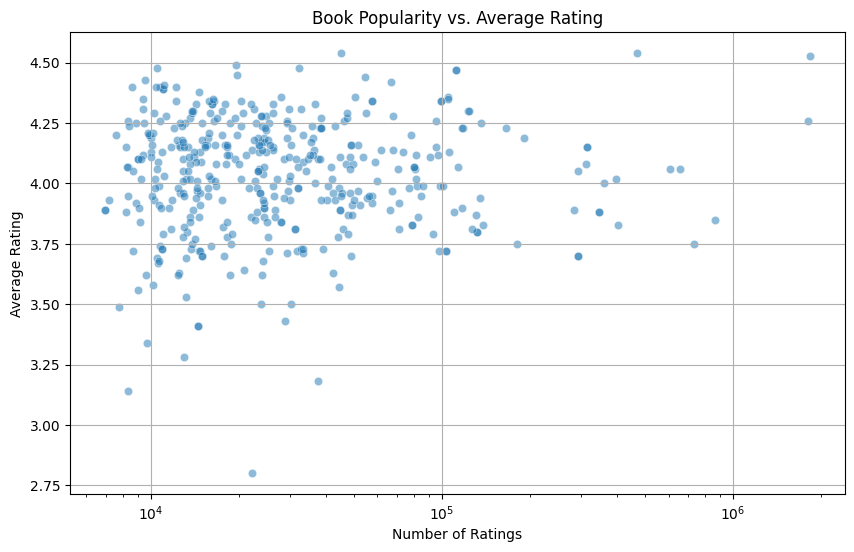

In [36]:
setup_plot(
    title="Book Popularity vs. Average Rating",
    xlabel="Number of Ratings",
    ylabel="Average Rating",
    figsize=(10,6),
    log_x=True
)
sns.scatterplot(data=combined_books, x='ratings_count', y='average_rating', alpha=0.5)
plt.show()


This plot shows the relationship between how frequently a book is rated and how highly it is rated. While many books with few ratings have varied average scores, extremely popular books tend to cluster around the 3.5–4.5 rating range. This suggests that popularity doesn't guarantee high ratings, but very low-rated books are rarely popular.



**Visualization 2: Average Rating by Age Group (Book-Crossing Users)**

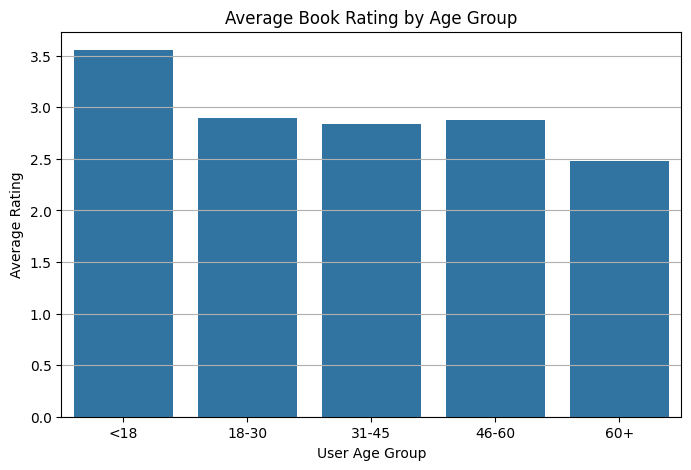

In [37]:
setup_plot(
    title="Average Book Rating by Age Group",
    xlabel="User Age Group",
    ylabel="Average Rating",
    figsize=(8,5)
)
sns.barplot(data=age_group_avg, x='AgeGroup', y='Book-Rating')
plt.show()


This bar chart reveals how average rating behavior varies by age group. If, for example, users aged 18–30 give higher ratings on average than those aged 45–60, this may indicate generational differences in book preferences or rating tendencies.

The analysis shows that **book popularity and average user ratings are weakly correlated**. Books with very high or very low average ratings are often less popular, while books with a high number of ratings tend to cluster around an average rating between 3.5 and 4.2. This suggests that while popularity can indicate general appeal, it does not guarantee higher user satisfaction.

Additionally, when segmented by age group, users under 30 tend to give slightly higher average ratings compared to older users. This may reflect generational differences in reading preferences or rating behavior. Therefore, **user demographics such as age can influence rating patterns**, and should be considered in recommendation or evaluation systems.


### **5.2:** Reflection



If I had more time, I would explore additional data quality improvements such as resolving inconsistencies in book titles and standardizing country names in the user location data. I would also investigate books with multiple ISBNs representing the same title to improve merge accuracy. Further, I would extend the analysis by exploring how rating behavior differs across countries or how review volume and average rating change over time. This could reveal deeper insights into user preferences and reading trends.
